####Executive Summary WebMD is an online publisher of health and wellness news and information. The site contains an extensive volume of drug-related information and it is one of the most popular healthcare websites in the U.S. Scraped from the WebMD website. our data includes around 0.36 million unique reviews that were updated until March 2020. The dataset also contains user evaluations of individual medications, as well as information on linked ailments, side effects, age, sex, and overall patient satisfaction ratings. In the project, we have utilized the NLTK packages and various types of classifiers such as decision tree, random forest and naive bayes to achieve the desired results. The project aims to extract advanced understandings and focuses on automating sentiment analysis on drug reviews in WebMD. More particularly, by examining those reviews in great detail, the project provides significant insights into parents' diverse conditions, summarized drug ratings, numerous medications classes, and sentiments from patients, ultimately constructing the most ideal combination of feature representation methods and classifiers that could predict a patient’s satisfaction given a particular drug.  Business Goal Analysis With analyses generated from the WebMD reviews, our goal is not only to establish sentiment ratings but also to predict future ratings by using machine learning algorithms. To automate such a process and significantly improve its efficiency, text analytics plays an imperative role since the majority of our data is heavily textual. Data visualizations are also an inseparable component of our project. More detailedly, the data visualizations include topics of drug ratings, medications classes, and patients' differentiated conditions. To achieve the business goal, we conducted data preprocessing, data cleaning, data consolidation and management, feature engineering, classification representations, and eventually data mining with different classifiers.

**Libraries**



In [1]:
#pip install altair vega_datasets
#pip install spacy
#conda install -c conda-forge wordcloud

import altair as alt
import itertools
import keras
import math
import numpy as np
import pandas as pd
import re
import string
import spacy
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import _stop_words
import nltk
nltk.download('stopwords')
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from keras.callbacks import EarlyStopping
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences

# Altair cannot do word cloud so I use Matplotlib just to render the image
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
%config InlineBackend.figure_format = "retina"


from sklearn import metrics
import seaborn as sns


import matplotlib.pyplot as plt
import re
import os
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics


from sklearn.naive_bayes import MultinomialNB # import naive bayes
from sklearn.tree import DecisionTreeClassifier # import Decision Tree
from sklearn.ensemble import RandomForestClassifier # import random forest

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import altair as alt
import itertools
import math
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt

# Read and Load Data

In [3]:
from google.colab import files


uploaded = files.upload()

Saving webmd.csv to webmd (1).csv


In [6]:
import io

df = pd.read_csv(io.BytesIO(uploaded['webmd (1).csv']))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362763 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


There are 11 original variables:

Age : age of user of the drug.
Condition: Symptoms the user was experiencing.
Date: The date the review was written.
Drug: Name of the drug.
DrugID: ID of the drug being reviewed.
EaseOfUse: On a scale 1-5 how easy it is to use the drug.
Effectiveness: On a scale 1-5 how effective was the drug.
Reviews: The actual user review.
Satisfaction: On a scale of 1-5 how satisfied were you with the drug.
Sex: The users gender.
Sides: Side effects of the drug.


In [ ]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [8]:
df = df[["Age", "Condition", "Drug", "DrugId", "Satisfaction", "Sex", "Reviews"]]
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362769 entries, 0 to 362805
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Age           362769 non-null  object
 1   Condition     362769 non-null  object
 2   Drug          362769 non-null  object
 3   DrugId        362769 non-null  int64 
 4   Satisfaction  362769 non-null  int64 
 5   Sex           362769 non-null  object
 6   Reviews       362769 non-null  object
dtypes: int64(2), object(5)
memory usage: 22.1+ MB


# Preprocessing & EDA

In [9]:
#to remove white spaces
for col in df.columns:
    if df[col].dtype.kind == "O":
        df[col] = df[col].str.strip()

In [ ]:
#to visualize unique values in df

data = [[col, df[col].nunique()] for col in df.columns.difference(["Reviews"])]
uniques = pd.DataFrame(data=data, columns=["columns", "num of unique values"])


bars = alt.Chart(uniques).mark_bar(size=35, color="#FFAA00", strokeWidth=1, stroke="white", strokeOpacity=0.7).encode(
    x=alt.X("num of unique values:Q"),
    y=alt.Y('columns:O', sort='-x'),
    tooltip=["num of unique values:Q", "columns:O"],
    color=alt.Color("num of unique values", scale=alt.Scale(scheme="lightgreyteal"))
).properties(title='Unique Values')

text = (alt.Chart()
           .mark_text(align="left",
                      baseline="middle",
                      dx=3)
           .encode(x=alt.X(shorthand="num of unique values:Q"),
                   y=alt.Y("columns:O",
                           axis=alt.Axis(title="columns",
                                         grid=False),
                           sort="-x"),
                   text="num of unique values:Q"))

chart = ((alt.layer(bars, text, data=uniques)
             .configure(background='#11043a')
             .configure_title(font="Arial",
                              fontSize=18,
                              color="#e6f3ff",
                              dy=-10)
             .configure_text(color="white")
             .configure_legend(titleFontSize=12,
                               titleColor="white",
                               tickCount=10,
                               titleOpacity=0.8,
                               labelColor="white",
                               labelOpacity=0.7,
                               titlePadding=10)
             .configure_axis(titleFontSize=13,
                             titlePadding=20,
                             titleColor="white",
                             titleOpacity=0.8,
                             labelColor="white",
                             labelOpacity=0.7,
                             labelFontSize=11,
                             tickOffset=0,
                             grid=True,
                             gridOpacity=0.15)
             .configure_view(strokeWidth=0)
             .properties(height=200, width=680)))

chart

alt.LayerChart(...)



*   There are many Condition types, might need a closer look
*   There are more Drug than DrugId values, drugs could have different names with same IDs
*   Satisfaction is supposed to be from 1 to 5, there are wrong vlaues
*   More than 2 genders



In [ ]:
#6, 10 are outliers of Satisfaction
df.Satisfaction.value_counts()

5     111537
1     100897
4      63149
3      51846
2      35337
6          2
10         1
Name: Satisfaction, dtype: int64

The column had a rating on a scale of how satisfied the user was with the drug, some users gave the rating of 6 ( 2 users) and one user gave the rating of 10.  Since those outliers were at an extremely small volume, we will remove them.  As for others, we will consolidate the scale by assigning a negative(0) rating if the originals were 1-2, a neutral (1) rating if the originals were 3, and a positive (2) rating if the original ratings were 4-5.

In [ ]:
#missing values of gender in reviews
df.Sex.value_counts()

Female    238203
Male       98033
           26533
Name: Sex, dtype: int64

In [ ]:
#to visualize missing values in each category
def missing_values(df):
    """Returns a summary of missing values in df"""
    nrows = df.shape[0]
    data = []

    def pct(n, total):
        return round(n/total, 2)

    for col in df.columns:

        # string (Object) type columns
        if df[col].dtype.kind == "O":
            df[col] = df[col].str.strip()
            nulls = df[df[col] == ""][col].count()
            nulls += df[col].isnull().sum()

        # numerical (int) type columns
        elif df[col].dtype.kind == "i":
            nulls = df[col].isnull().sum()

        pctofnulls = pct(nulls, nrows)
        data.extend(
            [{"column": col, "pct": 1-pctofnulls, "num of records": nrows-nulls, "type": "not missing"},
             {"column": col, "pct": pctofnulls, "num of records": nulls, "type": "missing"}])

    return pd.DataFrame(data)

missing = missing_values(df)

bars = (alt.Chart()
           .mark_bar(size=14,
                     strokeWidth=1,
                     stroke="white",
                     strokeOpacity=0.7,
                     )
           .encode(x=alt.X("sum(num of records)",
                           axis=alt.Axis(title="number of records",
                                         grid=True)),
                   y=alt.Y("column:O",
                           axis=alt.Axis(title="columns")),
                   tooltip=("column", "type", "num of records:Q",
                            alt.Tooltip("pct:Q", format=".1%")),
                   color=alt.Color("type",
                                   scale=alt.Scale(range=["#11043a", "#648bce"])))
           .properties(title="Missing Values"))

text = (alt.Chart()
           .mark_text(align="right",
                      dx=3)
           .encode(x=alt.X("sum(num of records)",
                           stack="zero"),
                   y=alt.Y("column"),
                   color=alt.Color("type",
                                   legend=None,
                                   scale=alt.Scale(range=["white"])),
                   text=alt.Text("pct", format=".0%")))

(alt.layer(bars, text, data=missing)
    .configure(background='#11043a')
    .configure_title(font="Arial",
                     fontSize=18,
                     color="#e6f3ff",
                     dy=-10)
    .configure_text(color="white")
    .configure_legend(titleFontSize=12,
                      titleColor="white",
                      tickCount=10,
                      titleOpacity=0.8,
                      labelColor="white",
                      labelOpacity=0.7,
                      titlePadding=10)
    .configure_axis(titleFontSize=13,
                    titlePadding=20,
                    titleColor="white",
                    titleOpacity=0.8,
                    labelFontSize=11,
                    labelColor="white",
                    labelOpacity=0.7,
                    tickOffset=0,
                    grid=False,
                    gridOpacity=0.15)
    .configure_view(strokeWidth=0)
    .resolve_scale(color='independent')
    .properties(height=300, width=680))

alt.LayerChart(...)

Majority missing values exist in age, reviews, sex, removing missing value rows


In [10]:
for col in ["Age", "Sex", "Reviews"]:
    df = df[(df[col].astype(bool) & df[col].notnull())]

In [ ]:
print(df["Satisfaction"].value_counts())
df = df[df["Satisfaction"] <= 5]

5    88586
1    87563
4    48603
3    40366
2    29332
6        2
Name: Satisfaction, dtype: int64


In [11]:
# categorizing if a review is positive (2) , neutral (1), negative(0)

def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

df["Satisfaction"] = df["Satisfaction"].apply(relabel)

In [12]:
df["Sex"].value_counts()

Sex
Female    212694
Male       81753
Name: count, dtype: int64

In [ ]:
df["Satisfaction"].value_counts()

2    137189
0    116895
1     40366
Name: Satisfaction, dtype: int64

In [13]:
drugs = {}
for drugid, drug in df[["DrugId", "Drug"]].itertuples(index=False):
    drugs.setdefault(drugid, set()).add(drug)
drugs = {k:list(v) for k,v in drugs.items()}

drugs_with_more_names = {k:list(v) for k,v in drugs.items() if len(v) > 1}
for k,v in dict(itertools.islice(drugs_with_more_names.items(), 10)).items():
    print(f"{k:10}: {list(v)[:5]}")


    167493: ['lynparza', 'lynparza tablet']
     11594: ['lovastatin', 'lovastatin tablet, extended release 24 hr']
      7286: ['loteprednol etabonate drops, suspension', 'loteprednol etabonate drops, gel', 'loteprednol etabonate ointment']
      7319: ['lotemax drops, gel', 'lotemax ointment']
    164437: ['lorcaserin tablet', 'lorcaserin tablet, extended release 24 hr']
      8892: ['lorazepam concentrate', 'lorazepam']
     76548: ['loratadine d', 'loratadine-d']
        73: ['loratadine', 'loratadine tablet,disintegrating']
      8555: ['loprox suspension, topical', 'loprox cream']
      4789: ['loperamide liquid', 'loperamide']


more drug names than drug iD becuase drugs could be in different formats

In [14]:
#frequency of the various conditions, and the number of unique drugs (DrugId) used to treat each condition.
value_count_per_condition = df["Condition"].value_counts()
value_count_per_condition_norm = df["Condition"].value_counts(normalize=True)
unique_drugs_per_condition = df.groupby("Condition")["DrugId"].apply(set).to_frame().reset_index()
unique_drugs_per_condition.columns = ["condition", "unique_drugs"]

tempdf = pd.DataFrame({"condition": value_count_per_condition.index,
                       "condition_freq": value_count_per_condition.values,
                       "condition_freq_norm": value_count_per_condition_norm.values})

tempdf = pd.merge(tempdf, unique_drugs_per_condition, on="condition")
tempdf

,condition,condition_freq,condition_freq_norm,unique_drugs
0,Other,43447,0.147555,"{163840, 1, 32771, 8197, 32774, 16389, 8200, 9..."
1,Pain,19154,0.065051,"{1025, 9730, 18436, 150021, 4101, 4105, 93196,..."
2,High Blood Pressure,17907,0.060816,"{518, 6670, 6671, 2069, 7194, 2077, 7212, 1438..."
3,Depression,11987,0.040710,"{1, 9475, 14211, 8323, 4870, 12167, 9353, 1370..."
4,Birth Control,10761,0.036546,"{155136, 165889, 162818, 92163, 8202, 160270, ..."
...,...,...,...,...
1674,An Infection caused by the Fungus Zygomycetes,1,0.000003,{13565}
1675,Inflammation of the Conjunctiva Occurring in t...,1,0.000003,{5304}
1676,Inflammation of Cornea and Conjunctiva Occurri...,1,0.000003,{5304}
1677,Clotted Line Connecting Artery to Vein,1,0.000003,{21807}


In [15]:
#to bin the amount of reviews for each condition
def mrange(*args, ceiling=True):
    """Returns money range generator, yields 1, 2, 5, 10, 20, 50..."""
    f = lambda x: (((x - 1) % 3)**2 + 1) * 10**((x-1)//3)
    if len(args) == 1:
        start, stop = 1, args[0]
    else:
        start, stop = max(1, args[0]), args[1]
    c = 1
    x = f(c)
    while x < start:
        c += 1
        x = f(c)
    while True:
        yield x
        c += 1
        x = f(c)
        if x > stop:
            break
    if ceiling:
        yield x

def roundup(x, nearest=1000):
    """Rounds x to the nearest 1000 or the optional argument."""
    return int(math.ceil(x / float(nearest))) * nearest

ceiling = roundup(value_count_per_condition[0]) + 1
bins = [0] + [x for x in mrange(20, ceiling)]
labels = [str(x) for x in bins[1:]]
binlabels = pd.cut(tempdf["condition_freq"], bins=bins, labels=labels)
conddf = tempdf.assign(bin=binlabels.values)

In [ ]:
#only selecting the 15 conditions with most review
topN = 15

data = conddf[:topN][["condition", "condition_freq", "condition_freq_norm"]]

bars = (alt.Chart(title=f"Top {topN} Conditions")
           .mark_bar(size=20,
                     strokeWidth=1,
                     stroke="white",
                     strokeOpacity=0.7,
                     xOffset=-1)
           .encode(x=alt.X("condition", sort="-y"),
                   y=alt.Y("condition_freq:Q",
                           axis=alt.Axis(title="number of reviews",
                                         grid=True)),
                   tooltip=("condition",
                            "condition_freq:Q",
                            alt.Tooltip("condition_freq_norm:Q", format=".1%")),
                   color=alt.Color("condition_freq:Q",
                                   scale=alt.Scale(scheme="lightgreyteal",
                                                   type="log"))))

text = (alt.Chart()
           .mark_text(align="center",
                      baseline="bottom",
                      dx=-1, dy=-3)
           .encode(x=alt.X("condition", sort="-y"),
                   y=alt.Y("condition_freq:Q"),
                   size = alt.SizeValue(9),
                   text=alt.Text("condition_freq_norm:Q", format=".1%")))

chart = (alt.layer(bars, text, data=data)
            .configure(background='#11043a')
            .configure_title(font="Arial",
                             fontSize=18,
                             color="#e6f3ff",
                             dy=-10)
            .configure_text(color="white")
            .configure_legend(title=None,
                              titleFontSize=12,
                              titleColor="white",
                              tickCount=5,
                              titleOpacity=0.8,
                              labelColor="white",
                              labelOpacity=0.7,
                              titlePadding=10)
            .configure_axis(titleFontSize=13,
                            titlePadding=20,
                            titleColor="white",
                            titleOpacity=0.8,
                            labelFontSize=12,
                            labelColor="white",
                            labelOpacity=0.7,
                            #labelAngle=45,
                            tickOffset=0,
                            grid=False,
                            gridOpacity=0.15)
            .configure_view(strokeWidth=0)
            .properties(height=300, width=700))
chart

alt.LayerChart(...)

As seen below in the graph, the conditions “ other” and “pain” were the top two conditions, which are both generic and non-indicative. Such findings suggest that our data needed further processing and manipulations.  

In [ ]:
df.Satisfaction.unique()

array([2, 1, 0])

In [ ]:
data = (df.groupby(["Age", "Satisfaction"])
          .agg({"Reviews": "count"})
          .reset_index()).sort_values(["Age", "Satisfaction"], ascending=True)
#data['Cumulative_Reviews'] = data.groupby(['Age'])['Reviews'].apply(lambda x: x.cumsum())

bars = (alt.Chart(data=data, title="Distribution of Reviews Over Age")
           .mark_bar(size=40,
                     strokeWidth=0.5,
                     stroke="white")
           .encode(x=alt.X('Age:O',
                           axis=alt.Axis(title="Age groups", grid=False)),
                   y=alt.Y('Reviews:Q', stack='zero',
                           scale=alt.Scale(type="linear"),
                           axis=alt.Axis(title="num of reviews")),
                   order=alt.Order('Satisfaction', sort='ascending'),
                   color=alt.Color("Satisfaction:Q",
                                   scale=alt.Scale(scheme="lightgreyteal",
                                                   bins=[0,1,2,3],
                                                   reverse=False))))

text = (alt.Chart(data=data[data["Reviews"] > 1500])
           .mark_text(align="center",
                      baseline="middle",
                      dx=0, dy=5)
           .encode(x=alt.X("Age:O"),
                   y=alt.Y("Reviews:Q", stack='zero'),
                   size = alt.SizeValue(9),
                   text="Reviews:Q",
                   color=alt.condition(alt.datum.Satisfaction > 1,
                                          alt.value("white"),
                                          alt.value("black"))))

chart = (alt.layer(bars, text)
            .configure(background="#11043a")
            .configure_title(font="Arial",
                             fontSize=18,
                             color="#e6f3ff",
                             dy=-10)
            .configure_text(color="white")
            .configure_legend(titleFontSize=12,
                              titleColor="white",
                              tickCount=10,
                              titleOpacity=0.8,
                              labelColor="white",
                              labelOpacity=0.7,
                              titlePadding=10)
            .configure_axis(titleFontSize=13,
                            titlePadding=20,
                            titleColor="white",
                            titleOpacity=0.8,
                            labelColor="white",
                            labelOpacity=0.7,
                            labelAngle=0,
                            tickOffset=0,
                            grid=True,
                            gridOpacity=0.15)
            .configure_view(strokeWidth=0)
            .properties(height=300, width=700)
)
chart

alt.LayerChart(...)

Following the visualization of top 15 conditions, we also visualized the distribution of reviews over age.  The graph below indicates that there are three groups with very minimal groups which are all at the age below 12. Given their young age, it is totally reasonable they are barely active.
And the most active age groups are people of ages between 45-54 and 55-64 compared to any other groups. Furthermore, we could also observe the quantities of reviews from the three different classes. There are large amounts of both positive and negative reviews whereas the neutral ones are very minimal.



In [ ]:
data = (df.groupby(["DrugId"])
          .agg({"Reviews": "count", "Satisfaction": "mean"})
          .reset_index()
          .sort_values(["Reviews"], ascending=False))
data["Drug"] = data["DrugId"].map(drugs)

alt.data_transformers.disable_max_rows()
scatter = (alt.Chart(title="Distribution Of Reviews Over Satisfaction")
            .mark_point(color="#648bce")
            .encode(x=alt.X('Satisfaction:Q',
                            axis=alt.Axis(title="Mean Satisfaction",
                                          grid=False)),
                    y=alt.Y('Reviews:Q',
                             scale=alt.Scale(type="log"),
                             axis=alt.Axis(title="Number of Reviews, log scaled")),
                    size='Reviews:Q',
                    color=alt.Color("Satisfaction:Q",
                                   scale=alt.Scale(scheme="lightgreyteal",
                                                   type="linear")),
                    tooltip=['DrugId', 'Drug', 'Reviews',
                              alt.Tooltip("Satisfaction", format=".3")])
            .interactive())

chart = (alt.layer(scatter, data=data[data["Reviews"] > 20])
            .configure(background='#11043a')
            .configure_title(font="Arial",
                             fontSize=18,
                             color="#e6f3ff",
                             dy=-10)
            .configure_text(color="white")
            .configure_legend(titleFontSize=12,
                              titleColor="white",
                              tickCount=6,
                              titleOpacity=0.8,
                              labelColor="white",
                              labelOpacity=0.7,
                              titlePadding=10)
            .configure_axis(titleFontSize=13,
                            titlePadding=20,
                            titleColor="white",
                            titleOpacity=0.8,
                            labelFontSize=11,
                            labelColor="white",
                            labelOpacity=0.7,
                            labelAngle=0,
                            tickOffset=0,
                            grid=False,
                            gridOpacity=0.15)
            .configure_view(strokeWidth=0)
            .properties(height=300, width=700)
)
chart

alt.LayerChart(...)

The scatter plot suggests a pretty homogenous distribution. The previous distribution by age has suggested there are less neutral reviews compared to negative and positive, therefore the mean Satisfaction mostly comes from the average of positive and negative reviews. Perhaps there are a few more larger bubbles above the mean rating 1 neutral than below it.

# Textual Preprocessings

Let's clean the text step by step so we can see the effect of each tool

In [24]:
indexes = np.random.randint(df.shape[0], size=3)
print(" ".join(df["Reviews"].iloc[indexes].tolist()))

can't sleep    want to start smoking after 20 years of stoping  can't think  legs hurt no period for 5 yrs. diagnosed with a moderately enlarged
pituitary gland, prolactin levels @ 70. started with 1/4 tablet of 2.5mg back in 1992...was not easy to get up to a full dose of 2.5mg/day. took a few months for me to get on a full dose..finally did , within a year my pituitary gland returned to normal size, prolactin levels went to 33 then 30, 28 it took awhile to see level 11.  Started to exercise a lot, as recommended my my endocrinologist "exercise, then breath, I was told...I did and levels finally reached 9....I range from 9-17...been on it since 1992! I exercise and then breathe...I believe exercise is very important for folks with this condition....hang in there, your cycle will return... I ws taking geodon for schzioaffective disorder. I was on geodon for about 2 months. It worked okay for a while. Then I started to have eye twitching. I stopped geodon but my eye still twitches.


In [25]:
mldf = df[['Satisfaction', 'Reviews']]

# remove any rows with new empty strings following the clean-up
mldf["Reviews"].replace("", np.nan, inplace=True)
mldf.dropna(inplace=True)
# adding indexes as "index" column for later use to recreate same splits
mldf.reset_index(inplace=True)

mldf

,index,Satisfaction,Reviews
0,0,2,I'm a retired physician and of all the meds I ...
1,1,2,cleared me right up even with my throat hurtin...
2,2,1,why did my PTINR go from a normal of 2.5 to ov...
3,3,0,FALLING AND DON'T REALISE IT
4,4,0,My grandfather was prescribed this medication ...
...,...,...,...
294442,362799,2,I have tried the patch and quitting cold turke...
294443,362801,2,I took the whole 12 weeks.I could have stopped...
294444,362803,0,"As long as I was on chantix, I didn't smoke. ..."
294445,362804,2,Started this medication Oct 5th 2008. Haven't ...


In [28]:

import time
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop = set(stopwords.words("english"))

customize_stop_words = ['pain', 'day', 'i', 'tale', 'take','effect', 'drug', 'work',
                        'side', 'get', 'mg', 'feel', 'customer', 'use', 'help', 'doctor', 'med', 'would','try','year','month','week',
                    'stop','took','time','start','like','m','tri','pill','ve','problem','sinc','dose','bad','good','prescrib','realli','s','hour',
                        'caus','better','sever','medicin','know','dr','went','need','great','everi','think','felt','thing','even','taken','want','ago','got',
                        't','chang','medic','life','notic','nt','long','hope','differ','away','bodi','treatment','far','extrem','control','never','still','well','work']

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def process_text(text):
    # remove non-alphabets
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # tokenize
    words = word_tokenize(text.lower())

    # remove stopwords
    words = [word for word in words if word not in stop]
    words = [word for word in words if word not in customize_stop_words]

    # stemming
    words = [ps.stem(word) for word in words]

    # lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # join the processed words
    return ' '.join(words)

#  time taken for processing
program_start = time.time()
mldf['Reviews'] = mldf['Reviews'].apply(process_text)
program_end = time.time()
print('Total time taken to process is {} seconds.'.format(round((program_end - program_start), 2)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total time taken to process is 230.45 seconds.


After having achieved some deeper understanding of our data, we got rid of any values that were not useful to us/ null values, it's time for the textual preprocessings.  We took a few steps to prepare data for analysis: tokenization, stemming, lemmatization,  and removal of stop words.Now we’ve eliminated noise in order to build a more efficient model.

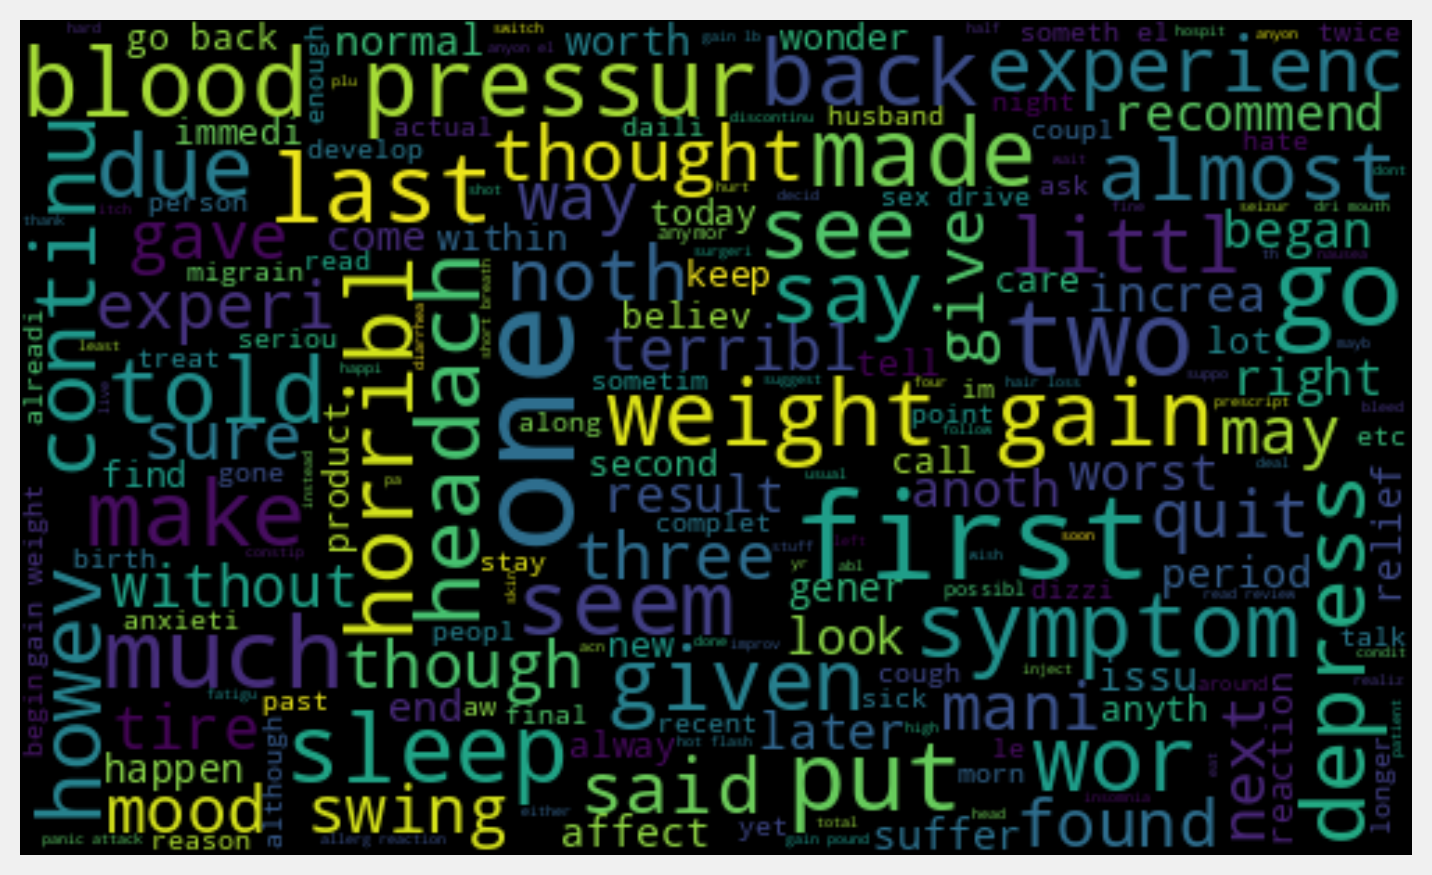

In [29]:
from wordcloud import WordCloud
negdf = mldf[mldf["Satisfaction"] == 0]
negatives = []
for review in negdf["Reviews"]:
    negatives.append(review)
negatives = pd.Series(negatives).str.cat(sep=" ")

wordcloud = WordCloud(width=500, height=300, max_font_size=50).generate(negatives)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

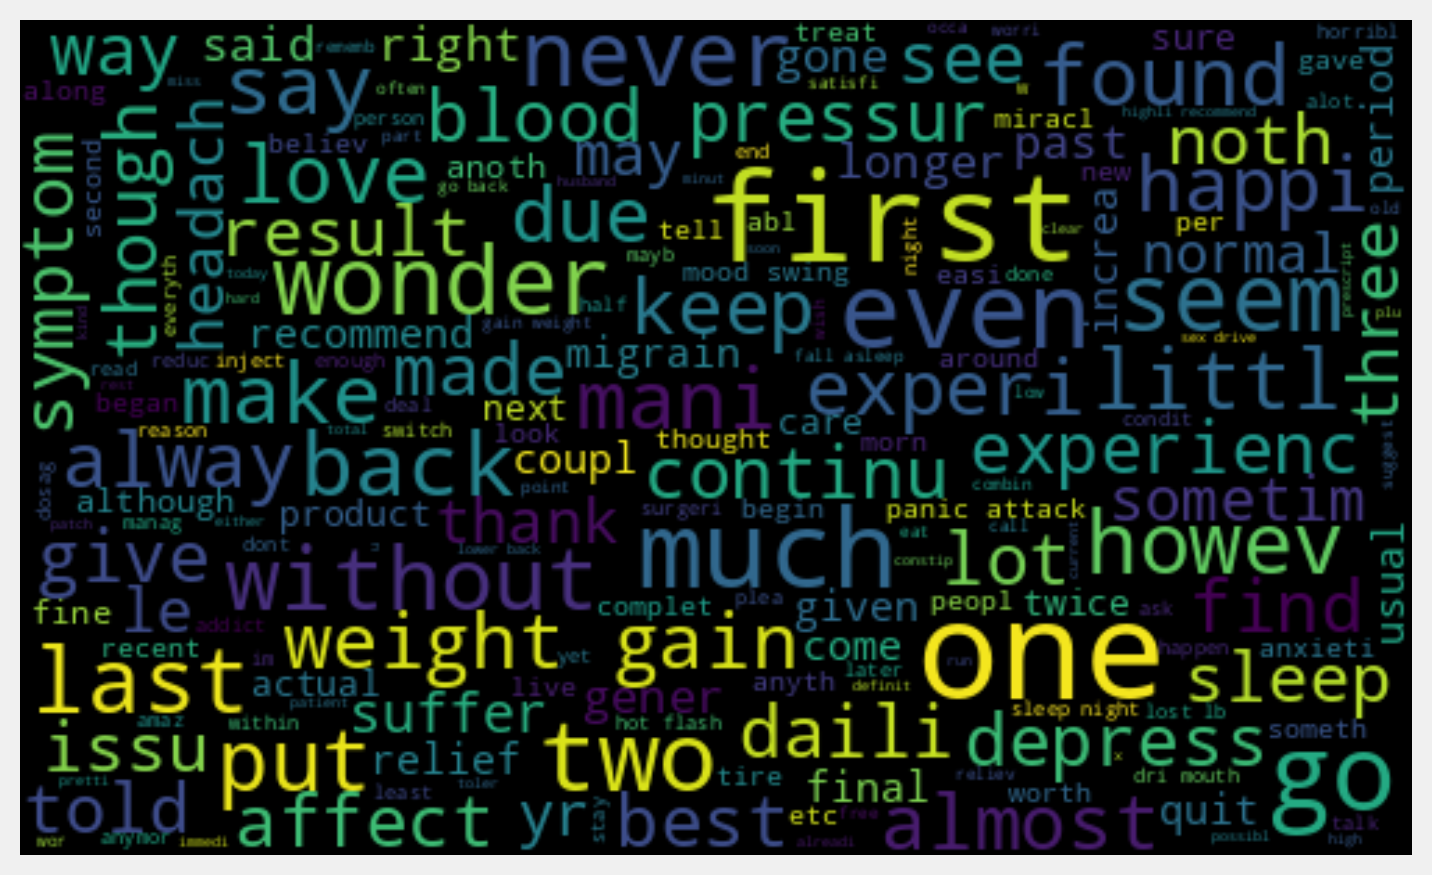

In [ ]:
posdf = mldf[mldf["Satisfaction"] == 2]
positives = []
for review in posdf["Reviews"]:
    positives.append(review)
positives = pd.Series(positives).str.cat(sep=" ")

wordcloud = WordCloud(width=500, height=300, max_font_size=50).generate(positives)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

word clouds for negative and positive reviews

In [30]:
mldf['Reviews']

0         retir physician allergi season one first began...
1                                   clear right throat hurt
2                                           ptinr go normal
3                                                fall reali
4         grandfath coumadin assist blood thin due heart...
                                ...                        
294442    patch quit cold turkey best way quit smoke due...
294443    whole could sooner thought go whole weird drea...
294444    chantix smoke terribl stomach upset constip he...
294445    oct th smoke plan full program sick accual eve...
294446    one chantix nauseou morn three found eat minut...
Name: Reviews, Length: 294447, dtype: object

# Feature Engineering & ML model





###Topic Modeling

In [31]:
mldf['Reviews'].value_counts()


Reviews
                                                                                                                                                                                                                                                                                                   3691
awsom love                                                                                                                                                                                                                                                                                          172
sleep                                                                                                                                                                                                                                                                                               170
back                                                                                                    

In [32]:

def get_simple_topic_percentage(topic):
    """
    Returns a percentage of rows that this particular topic is found
    in using simple string manipulation.

    """
    return mldf[mldf['Reviews'].str.contains(topic, case=False)].shape[0] / len(mldf['Reviews']) * 100


print('pain:', get_simple_topic_percentage('pain'))
print('work:', get_simple_topic_percentage('work'))
print('treatment', get_simple_topic_percentage('treatment'))
print('work well', get_simple_topic_percentage('work well'))
print('pill', get_simple_topic_percentage('pill'))


pain: 0.3759590011105564
work: 0.7182956525282989
treatment 0.004415056020268503
work well 0.0
pill 0.11750841407791555


[('sleep', 39667), ('night', 30744), ('weight', 27580), ('depress', 27391), ('headach', 22843), ('gain', 22032), ('blood', 20432), ('period', 19193), ('stomach', 18204), ('anxieti', 18079), ('leg', 16231), ('normal', 15822), ('mani', 14782), ('tire', 14643), ('eat', 14411), ('wor', 14180), ('dizzi', 14042), ('cramp', 13749), ('abl', 13698), ('migrain', 13605), ('old', 13442), ('infect', 13237), ('morn', 13181), ('daili', 13096), ('mood', 12895), ('high', 12790), ('pressur', 12504), ('heart', 12392), ('someth', 12368), ('nausea', 12313)]


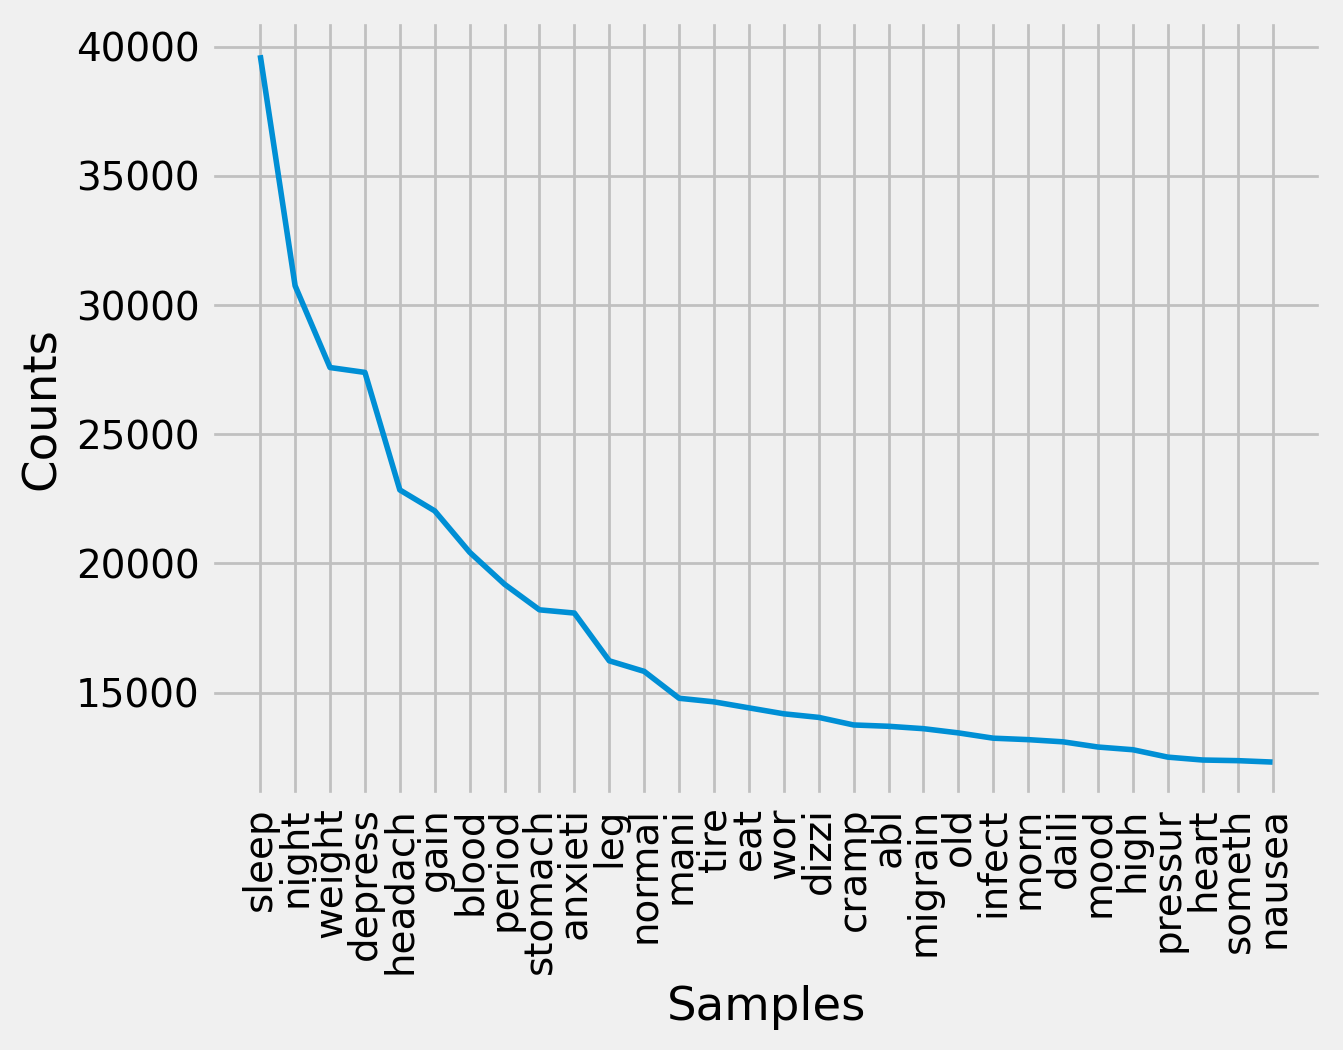

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
from spacy.lang.en import English
from nltk import FreqDist
nlp = English()


customize_stop_words = ['well','ok',' ','awsom love','much','none','seem','wonder','symptom','experienc','nt','littl','increa','lot','howev','thought',
                        'right','experi','anyon','read','told','recommend','sure','find','found','go']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True


def tokenize(text):
    spacy_doc = nlp(text)
    filtered_tokens = [token.text.lower() for token in spacy_doc if not token.is_stop]
    return filtered_tokens

# tokenize
doc = mldf['Reviews'].apply(tokenize)

# flatten the list of lists into a single list
flat_doc = [item for sublist in doc for item in sublist]

# create FreqDist
fdist = FreqDist(flat_doc)
print(fdist.most_common(30))
fdist.plot(30)


In [34]:

import gensim
from gensim.corpora import Dictionary

dictionary = Dictionary(doc)

print('Distinct words in initial documents:', len(dictionary))

# filter out words that occur less than 10 documents, or more than 30% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.3)

print('Distinct words after removing rare and common words:', len(dictionary))

Distinct words in initial documents: 67770
Distinct words after removing rare and common words: 11962


In [35]:
corpus = [dictionary.doc2bow(d) for d in doc]



In [ ]:
from gensim.models import CoherenceModel, LdaModel



# train the LDA model
num_topics = 3
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)


topics = lda_model.print_topics()
for topic in topics:
    print(topic)

# assign topics to documents
mldf['topic'] = [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]
print(mldf[['Reviews', 'topic']])

(0, '0.014*"infect" + 0.011*"blood" + 0.009*"leg" + 0.008*"heart" + 0.007*"muscl" + 0.007*"pressur" + 0.006*"skin" + 0.006*"itch" + 0.006*"burn" + 0.006*"foot"')
(1, '0.022*"night" + 0.019*"sleep" + 0.015*"stomach" + 0.013*"weight" + 0.012*"nausea" + 0.011*"gain" + 0.011*"eat" + 0.010*"period" + 0.010*"headach" + 0.008*"cramp"')
(2, '0.021*"smoke" + 0.016*"chantix" + 0.015*"depress" + 0.012*"quit" + 0.012*"anxieti" + 0.006*"sleep" + 0.006*"celexa" + 0.006*"attack" + 0.006*"peopl" + 0.005*"panic"')
                                                  Reviews  topic
0       retir physician allergi season one first began...      0
1                            clear right even throat hurt      0
2                                         ptinr go normal      1
3                                              fall reali      2
4       grandfath coumadin assist blood thin due heart...      0
...                                                   ...    ...
294445  patch quit cold turkey best way qu

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvico

In [38]:
from gensim.models import TfidfModel, LdaMulticore
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim
from spacy.lang.en import English
import logging



# set up logging to see what's going wrong
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# TF-IDF model
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# coherence compare
def calc_coherence_values(model_type, dictionary, corpus, texts, limit=12, start=1, step=1, passes=5, workers=4,alpha = 'auto'):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        if model_type == 'LdaModel':
            model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, alpha='auto')
        elif model_type == 'LdaMulticore':
            model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, alpha= alpha, random_state=42, workers=workers)
        else:
            raise ValueError("Invalid model_type. Use 'LdaModel' or 'LdaMulticore'.")

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


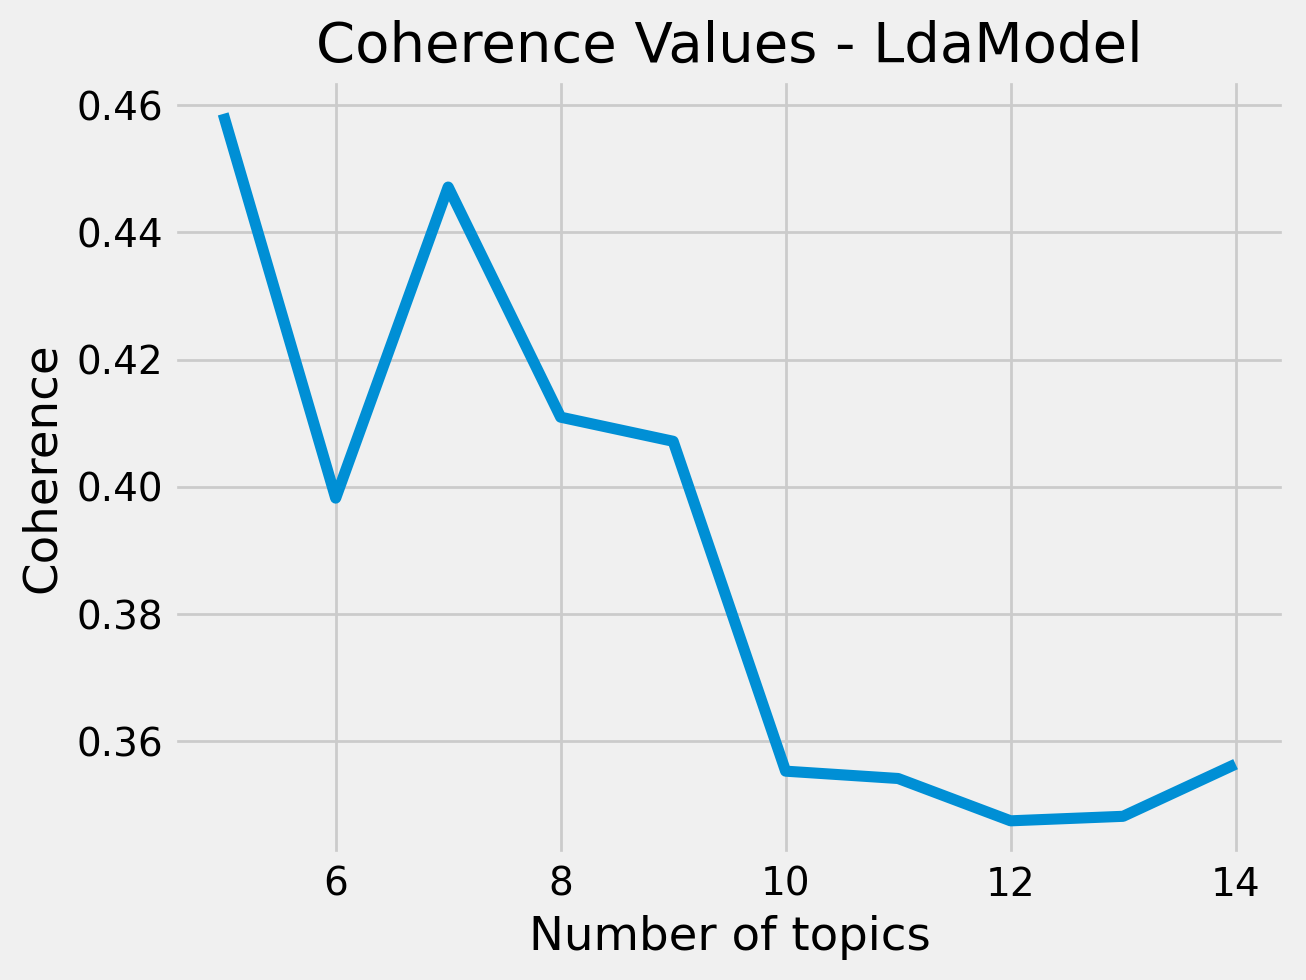

In [ ]:
# coherence values using LdaModel
model_list_lda, coherence_values_lda = calc_coherence_values('LdaModel', dictionary, corpus_tfidf, doc, start=5, limit=15, step=1, passes=5, workers=1,alpha = 'auto')

# p1lot coherence values
x_lda = range(5, 15, 1)
plt.plot(x_lda, coherence_values_lda)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence Values - LdaModel")
plt.show()

In [ ]:
# find the index of the optimal number of topics
index_lda = coherence_values_lda.index(max(coherence_values_lda))

# select the optimal LdaModel
optimal_model_lda = model_list_lda[index_lda]

# Print topics for the optimal LdaModel
topics_lda = optimal_model_lda.print_topics(num_topics=-1, num_words=10)
for topic in topics_lda:
    print(topic)

(0, '0.011*"stomach" + 0.010*"infect" + 0.009*"headach" + 0.008*"blood" + 0.008*"nausea" + 0.007*"leg" + 0.007*"dizzi" + 0.006*"pressur" + 0.006*"itch" + 0.006*"muscl"')
(1, '0.133*"smoke" + 0.092*"chantix" + 0.028*"period" + 0.021*"pack" + 0.015*"hot" + 0.014*"acn" + 0.014*"bleed" + 0.013*"flash" + 0.012*"spot" + 0.011*"yeast"')
(2, '0.010*"sleep" + 0.009*"depress" + 0.008*"anxieti" + 0.007*"quit" + 0.006*"dream" + 0.006*"night" + 0.005*"weight" + 0.005*"attack" + 0.005*"gain" + 0.004*"mood"')
(3, '0.047*"vivid" + 0.025*"acid" + 0.024*"gout" + 0.023*"erect" + 0.020*"reflux" + 0.016*"strep" + 0.015*"inflamm" + 0.013*"ate" + 0.012*"yogurt" + 0.011*"depo"')
(4, '0.026*"celexa" + 0.015*"cigarett" + 0.011*"crestor" + 0.009*"celebrex" + 0.008*"urg" + 0.007*"allergi" + 0.007*"cholesterol" + 0.006*"form" + 0.006*"anxiou" + 0.006*"stool"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


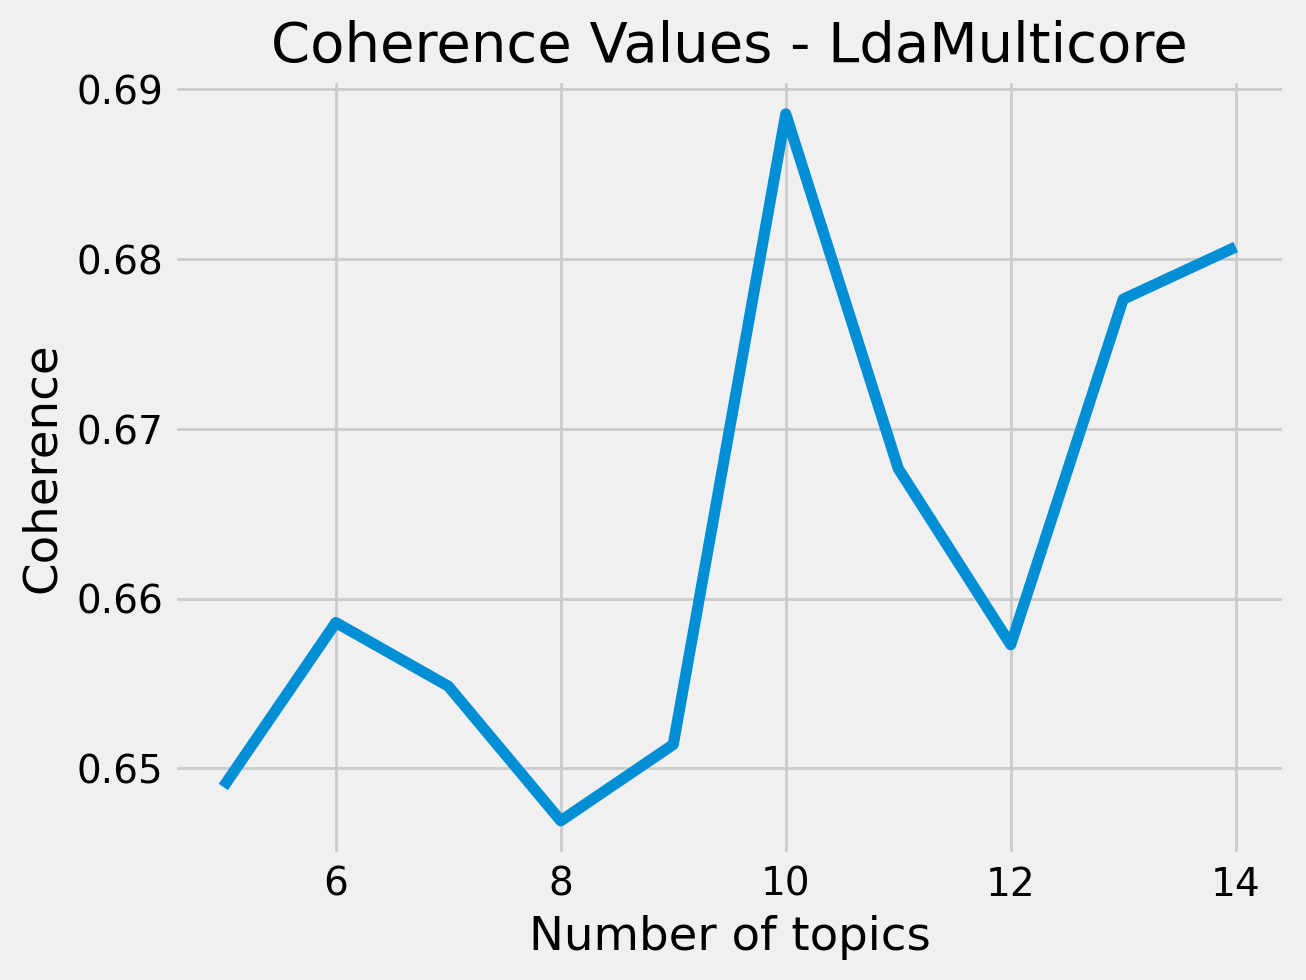

In [39]:
# coherence values using LdaMulticore
model_list_multicore, coherence_values_multicore = calc_coherence_values('LdaMulticore', dictionary, corpus_tfidf, doc, start=5, limit=15, step=1, passes=5, workers=4, alpha=0.01)

# plot coherence values
x_multicore = range(5, 15, 1)
plt.plot(x_multicore, coherence_values_multicore)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.title("Coherence Values - LdaMulticore")
plt.show()

In [40]:
# find the index of the optimal number of topics
index_multicore = coherence_values_multicore.index(max(coherence_values_multicore))

# select the optimal LdaMulticore model
optimal_model_multicore = model_list_multicore[index_multicore]

# Print topics for the optimal LdaMulticore model
topics_multicore = optimal_model_multicore.print_topics(num_topics=-1, num_words=10)
for topic in topics_multicore:
    print(topic)

(0, '0.025*"sleep" + 0.018*"night" + 0.011*"leg" + 0.010*"muscl" + 0.010*"asleep" + 0.009*"cramp" + 0.009*"wake" + 0.008*"fall" + 0.007*"morn" + 0.007*"stomach"')
(1, '0.006*"insur" + 0.006*"gener" + 0.005*"addict" + 0.005*"expen" + 0.005*"thank" + 0.005*"cost" + 0.004*"pay" + 0.004*"tell" + 0.004*"plea" + 0.004*"peopl"')
(2, '0.026*"weight" + 0.021*"gain" + 0.015*"lb" + 0.014*"lost" + 0.012*"loss" + 0.011*"eat" + 0.011*"hair" + 0.011*"pound" + 0.009*"lose" + 0.008*"tire"')
(3, '0.019*"period" + 0.010*"acn" + 0.010*"birth" + 0.009*"bleed" + 0.009*"mood" + 0.008*"flash" + 0.008*"hot" + 0.007*"swing" + 0.007*"sex" + 0.007*"cramp"')
(4, '0.013*"relief" + 0.011*"knee" + 0.009*"nerv" + 0.009*"surgeri" + 0.008*"reliev" + 0.008*"arthriti" + 0.007*"neck" + 0.007*"chronic" + 0.007*"fibromyalgia" + 0.007*"leg"')
(5, '0.014*"seizur" + 0.006*"sleep" + 0.006*"migrain" + 0.004*"depress" + 0.004*"keppra" + 0.004*"topamax" + 0.004*"bipolar" + 0.004*"ambien" + 0.004*"depakot" + 0.004*"disord"')
(6, '0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Split data into training / testing sets

Before beginning on working statistical methods, we splitted our data corpus into two parts.  70% of the data was on the training set, which is used for the machine to “train” on,  to develop an algorithm fitted to this type of data, and to classify new data as accurately as possible. The remaining 30% of the data was for the machine to “test” on.  Our dataset is considered a golden standard dataset, meaning the machine learning is to be supervised since we already knew what the “correct” answers of the sentiments were.  This way we would be able to calculate how accurate our models are.

In [ ]:
### training and test set splits
train_corpus, test_corpus, train_labels, test_labels = train_test_split(mldf["Reviews"],
                                                                        mldf['Satisfaction'],
                                                                        test_size=0.3)
train_index = train_corpus.index
test_index = test_corpus.index

In [ ]:
print(train_corpus.shape)
print(test_corpus.shape)

(206093,)
(88326,)


In [ ]:
print(len(train_corpus))
train_corpus

206093


15828     one time use satisfi result work need pain low...
67903          belli pain sever constant dirahea light head
141656                                     muscl joint pain
134883    taken sectral mani year veri high triglycerid ...
233387                              seem work w make drowsi
                                ...                        
170992    fibromyalgia onset rehumoid arthriti hand foot...
1055      thi drug wa god send allow live fybromyalgia p...
210844    everyon review enbrel seem good result use mon...
48593     seem work well wa unawar caus drowsi take twic...
144053    tri sprintec month honestli havent seen ani ma...
Name: Reviews, Length: 206093, dtype: object

In [ ]:
train_labels

15828     2
67903     0
141656    0
134883    2
233387    2
         ..
170992    1
1055      1
210844    0
48593     2
144053    2
Name: Satisfaction, Length: 206093, dtype: int64

### TF - IDF

TF- IDF uses two statistical methods: term frequency and inverse document frequency.  Term frequency refers to the total number of times a given term t appears in the document per the total number of words in the document.  While the inverse document frequency measures how much information the word provides.  It measures the weight of a given word in the entire document. IDF shows how common or how rare a given word is across all documents.
The TF-IDF model contains information on the more important words and less important words as well.  This model is considered to be a highly efficient type of feature extraction.



In [ ]:
tfidf_vectorizer=TfidfVectorizer(min_df=30,
                                 max_df=0.90,
                                 max_features=5000,
                                 norm='l2',
                                 smooth_idf=True,
#                                  th_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
tfidf_train_features = tfidf_vectorizer.fit_transform(train_corpus)
tfidf_test_features = tfidf_vectorizer.transform(test_corpus)

In [ ]:
tfidf_test_features.shape

(88326, 5000)

In [ ]:
count_array1 = tfidf_test_features.toarray()
newdf = pd.DataFrame(data=count_array1,columns = tfidf_vectorizer.get_feature_names_out())
print(newdf.shape)
newdf.head(20)

newdf

(88326, 5000)


,aa,ab,abat,abcess,abd,abdomen,abdomin,abil,abilifi,abl,...,zolpidem,zombi,zomig,zone,zonegran,zovia,zpack,zyclara,zyprexa,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.100149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212582,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# define a function to evaluate our classification models based on four metrics

def get_metrics(true_labels, predicted_labels):

    print ('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels,
                                               predicted_labels),
                        2))
    print ('Precision:', np.round(
                        metrics.precision_score(true_labels,
                                               predicted_labels),
                        2))
    print ('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                               predicted_labels),
                        2))
    print ('F1 Score:', np.round(
                        metrics.f1_score(true_labels,
                                               predicted_labels),
                        2))



# define a function that trains the model, performs predictions and evaluates the predictions
def train_predict_evaluate_model(classifier,
                                 train_features, train_labels,
                                 test_features, test_labels):
    # build model. fit(x,y)
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features)
    # evaluate model prediction performance
    '''get_metrics(true_labels=test_labels,
                predicted_labels=predictions)'''
    print(metrics.classification_report(test_labels,predictions))
    return predictions, metrics.accuracy_score(test_labels,predictions)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     34809
           1       0.44      0.00      0.00     12104
           2       0.66      0.84      0.74     41413

    accuracy                           0.67     88326
   macro avg       0.59      0.51      0.47     88326
weighted avg       0.64      0.67      0.62     88326

[[24079     7 10723]
 [ 4742     8  7354]
 [ 6724     3 34686]]


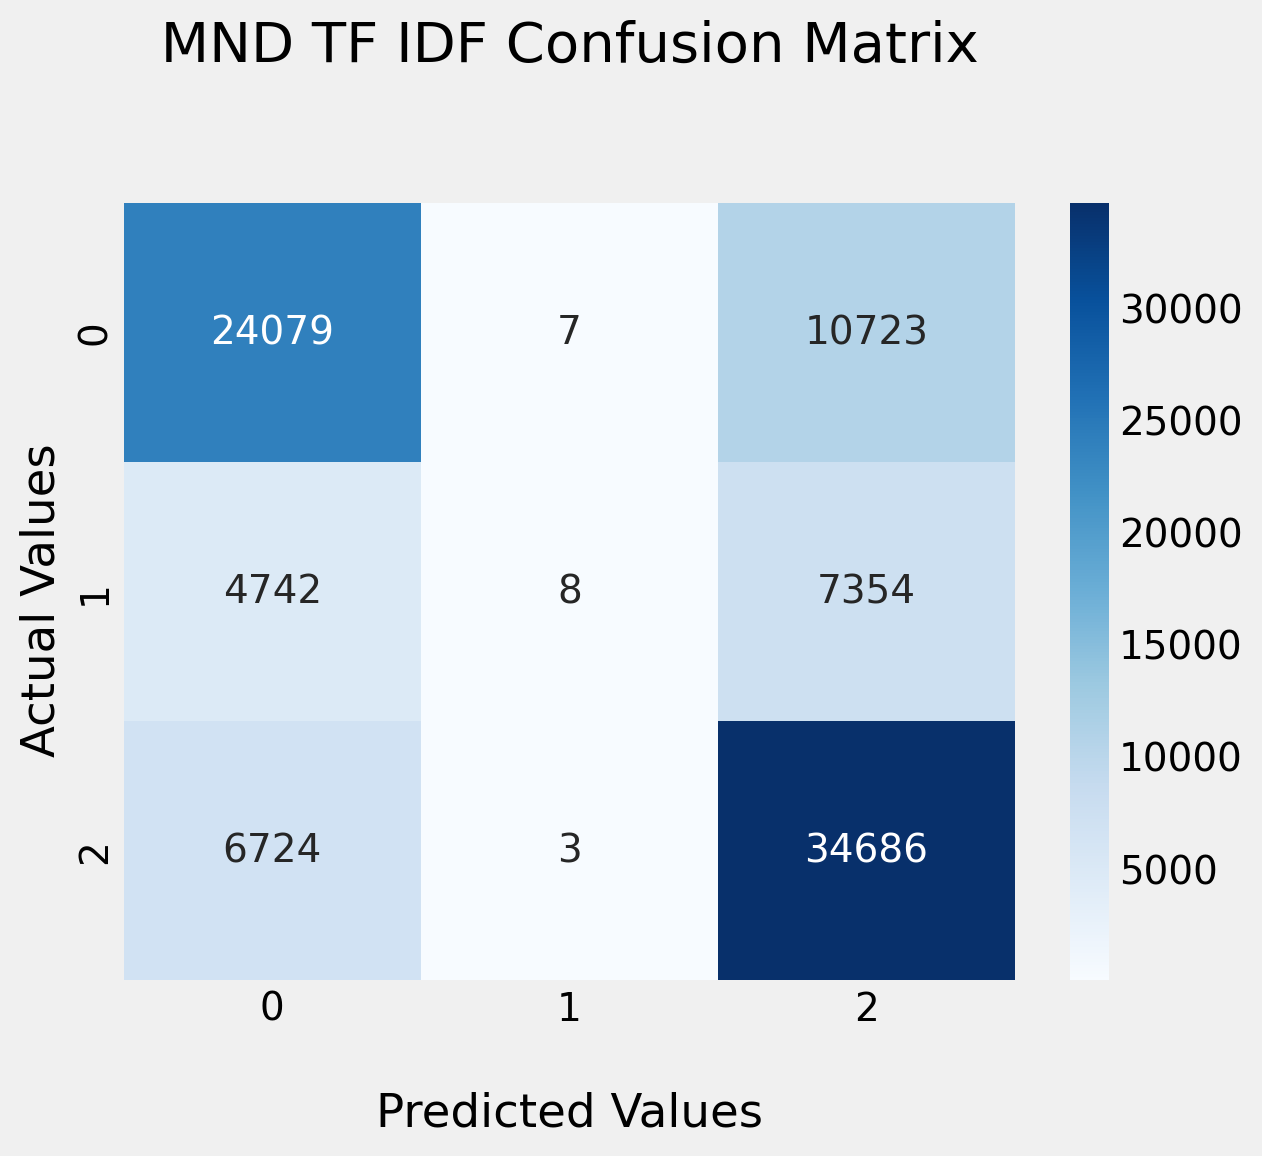

In [ ]:
mnb = MultinomialNB()
# predict and evaluate naive bayes
mnb_tfidf_predictions, mnb_tfidf_accuracy = train_predict_evaluate_model(classifier=mnb,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)


mnd_tfidf_cm = confusion_matrix( test_labels,mnb_tfidf_predictions)
print(mnd_tfidf_cm)

ax = sns.heatmap(mnd_tfidf_cm, annot=True, cmap='Blues', fmt = 'g')

ax.set_title(' MND TF IDF Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#ax.xaxis.set_ticklabels(['True','False'])
#ax.yaxis.set_ticklabels(['True', 'False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
# predict and evaluate decision tree
dt_tfidf_predictions, dt_tfidf_accuracy = train_predict_evaluate_model(classifier=dt,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     34809
           1       0.45      0.40      0.42     12104
           2       0.72      0.73      0.72     41413

    accuracy                           0.67     88326
   macro avg       0.61      0.60      0.61     88326
weighted avg       0.66      0.67      0.66     88326



[[23983  2700  8126]
 [ 3410  4823  3871]
 [ 8196  3093 30124]]


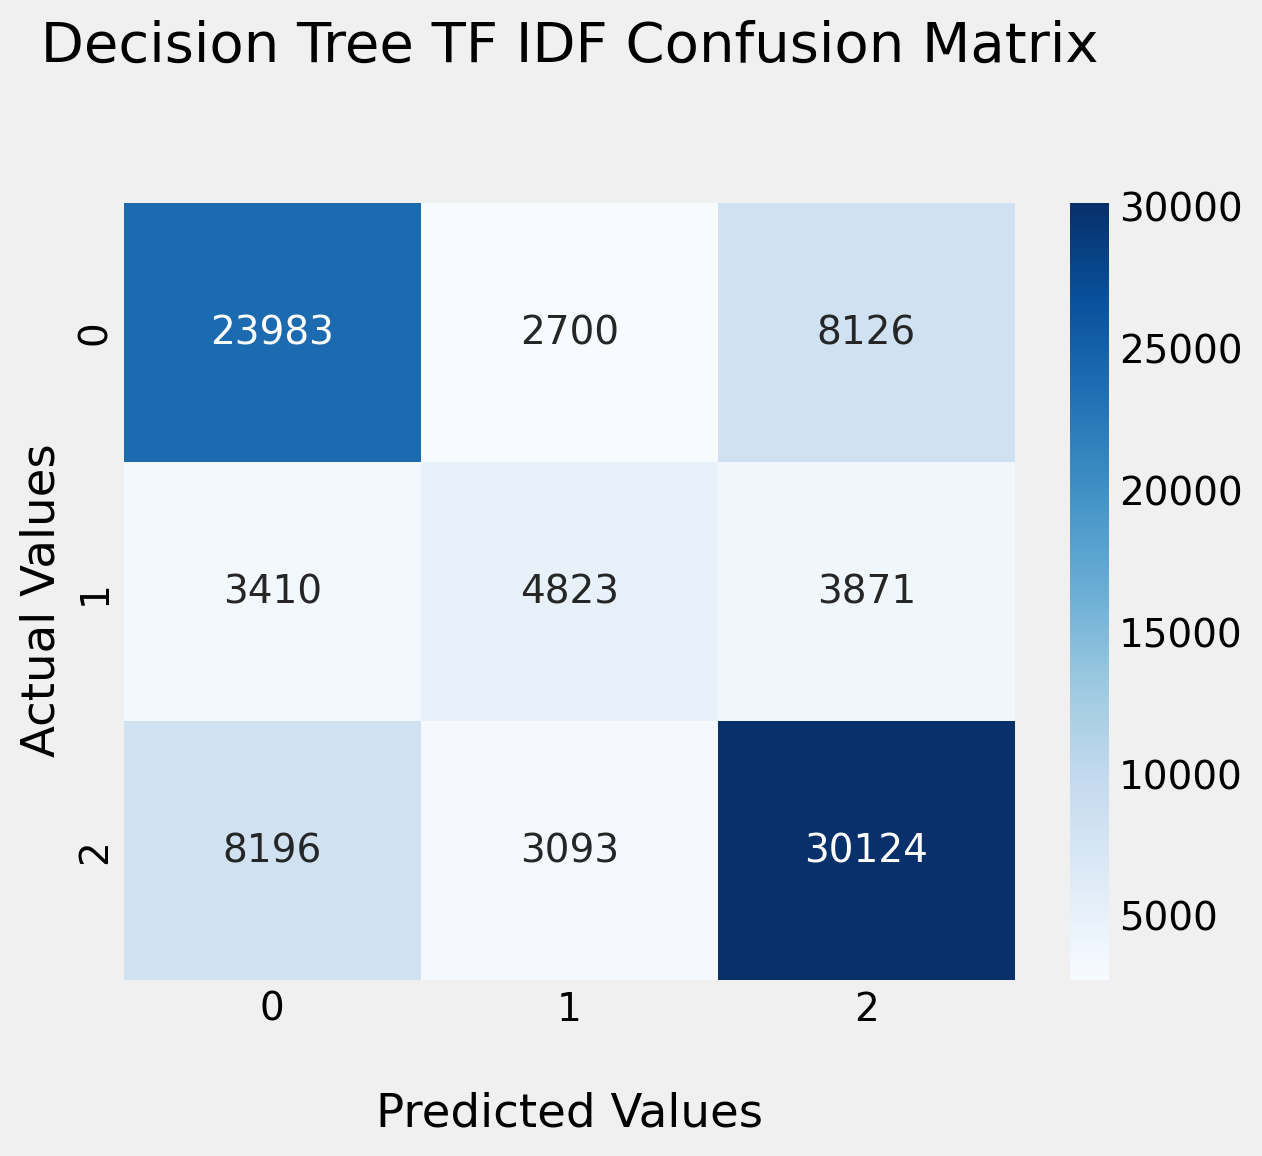

In [ ]:
dt_tfidf_cm = confusion_matrix( test_labels, dt_tfidf_predictions)
print(dt_tfidf_cm)

ax = sns.heatmap(dt_tfidf_cm, annot=True, cmap='Blues', fmt = 'g')

ax.set_title(' Decision Tree TF IDF Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
rf = RandomForestClassifier(criterion="entropy")
# predict and evaluate random forest
rf_tfidf_predictions, rf_tfidf_accuracy = train_predict_evaluate_model(classifier=rf,
                                           train_features=tfidf_train_features,
                                           train_labels=train_labels,
                                           test_features=tfidf_test_features,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     34809
           1       0.92      0.31      0.47     12104
           2       0.76      0.87      0.81     41413

    accuracy                           0.77     88326
   macro avg       0.81      0.66      0.68     88326
weighted avg       0.78      0.77      0.75     88326



[[27678   169  6962]
 [ 3559  3786  4759]
 [ 5102   161 36150]]


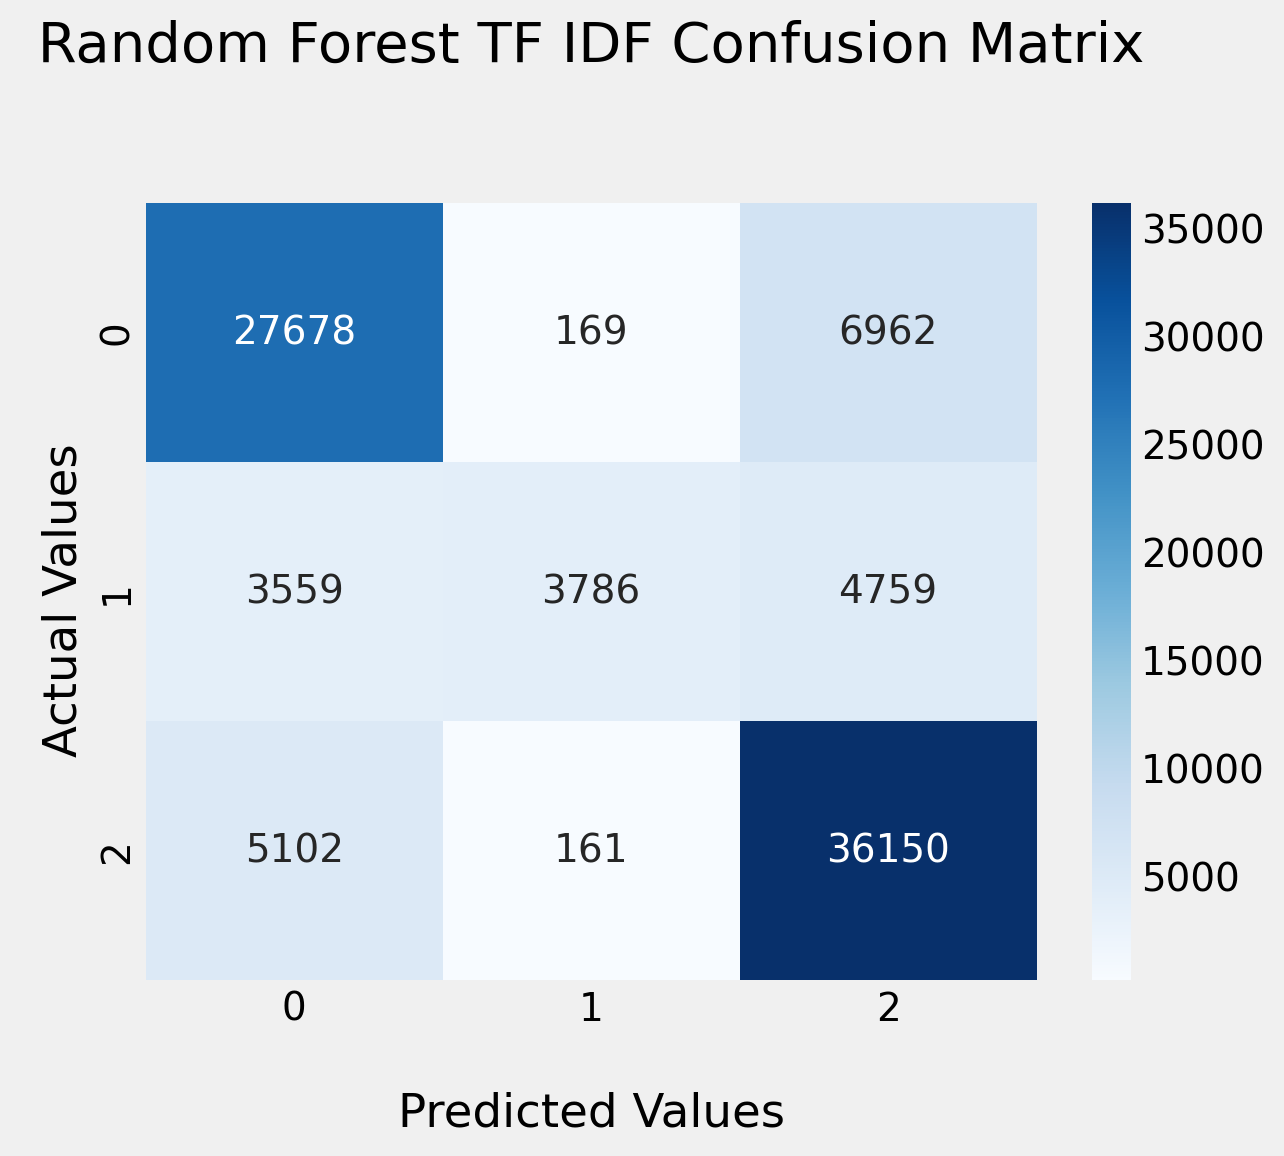

In [ ]:
rf_tfidf_cm = confusion_matrix( test_labels, rf_tfidf_predictions)
print(rf_tfidf_cm)

ax = sns.heatmap(rf_tfidf_cm, annot=True, cmap='Blues', fmt = 'g')

ax.set_title(' Random Forest TF IDF Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

### BOW

Bag - of - Words (BoW) model simply counts the occurrence of each word in each document.  Order of words is not especially important in this method, picture all words from a sentence cut out and thrown into a bag, hence where the name came from.

In [ ]:
bow_vectorizer=CountVectorizer(min_df=30, max_df=0.90,max_features=5000,ngram_range=(1,1))
# print(bow_vectorizer)
#In short, fit is used to train the feature model, once it's trained you can use that model to apply to the text data
bow_train_features = bow_vectorizer.fit_transform(train_corpus)
#apply model to test data
bow_test_features = bow_vectorizer.transform(test_corpus)

In [ ]:
print(bow_train_features.shape)
print(bow_train_features)

(206093, 5000)
  (0, 4788)	3
  (0, 3482)	1
  (0, 2994)	2
  (0, 1855)	1
  (0, 673)	2
  (0, 3053)	1
  (0, 4951)	1
  (0, 3396)	1
  (0, 4857)	1
  (0, 3020)	1
  (0, 4836)	1
  (0, 1696)	1
  (0, 1326)	1
  (0, 3144)	1
  (0, 4917)	1
  (0, 4184)	1
  (0, 2733)	2
  (0, 1527)	1
  (0, 1576)	1
  (0, 150)	1
  (0, 2870)	1
  (0, 4769)	1
  (0, 2193)	1
  (0, 1987)	1
  (0, 4693)	1
  :	:
  (206091, 4915)	1
  (206091, 2672)	2
  (206091, 1990)	1
  (206091, 4554)	1
  (206091, 755)	1
  (206091, 4479)	1
  (206091, 323)	1
  (206091, 2942)	1
  (206091, 2015)	1
  (206091, 1626)	1
  (206091, 1895)	1
  (206091, 925)	1
  (206091, 1030)	1
  (206091, 734)	2
  (206091, 356)	1
  (206091, 1469)	1
  (206092, 3396)	1
  (206092, 1371)	1
  (206092, 1967)	1
  (206092, 2758)	1
  (206092, 3876)	1
  (206092, 1260)	1
  (206092, 3534)	1
  (206092, 1516)	1
  (206092, 140)	1


In [ ]:
print(bow_test_features.shape)
print(bow_test_features)

(88326, 5000)
  (0, 309)	1
  (0, 323)	1
  (0, 1101)	1
  (0, 1103)	1
  (0, 1166)	1
  (0, 1310)	1
  (0, 1419)	1
  (0, 1448)	1
  (0, 1622)	1
  (0, 2512)	1
  (0, 2914)	1
  (0, 3131)	1
  (0, 3167)	1
  (0, 3234)	1
  (0, 3544)	1
  (0, 3654)	1
  (0, 3727)	1
  (0, 3876)	1
  (0, 3926)	1
  (0, 4357)	1
  (0, 4788)	1
  (0, 4852)	1
  (0, 4916)	1
  (1, 1419)	1
  (1, 1967)	1
  :	:
  (88324, 4908)	1
  (88324, 4958)	1
  (88324, 4973)	1
  (88325, 830)	1
  (88325, 1035)	1
  (88325, 1335)	1
  (88325, 1524)	1
  (88325, 1571)	1
  (88325, 2284)	1
  (88325, 2751)	1
  (88325, 2803)	1
  (88325, 2851)	1
  (88325, 3022)	1
  (88325, 3567)	1
  (88325, 3708)	1
  (88325, 3906)	1
  (88325, 3917)	1
  (88325, 4015)	1
  (88325, 4209)	1
  (88325, 4411)	1
  (88325, 4498)	1
  (88325, 4691)	1
  (88325, 4735)	1
  (88325, 4849)	1
  (88325, 4908)	1


In [ ]:
count_array = bow_train_features.toarray()
df = pd.DataFrame(data=count_array,columns = bow_vectorizer.get_feature_names())
print(df.shape)

In [ ]:
print(len(bow_vectorizer.get_feature_names()))
# bow_vectorizer.get_feature_names()

5000


In [ ]:
mnb_bow_predictions, mnb_bow_accuracy = train_predict_evaluate_model(classifier=mnb,
                                           train_features=bow_train_features,
                                           train_labels=train_labels,
                                           test_features=bow_test_features,
                                           test_labels=test_labels)


              precision    recall  f1-score   support

           0       0.68      0.69      0.68     34906
           1       0.29      0.19      0.23     12152
           2       0.70      0.76      0.73     41268

    accuracy                           0.65     88326
   macro avg       0.55      0.54      0.55     88326
weighted avg       0.63      0.65      0.64     88326



[[23926  2852  8128]
 [ 4314  2336  5502]
 [ 7094  2948 31226]]


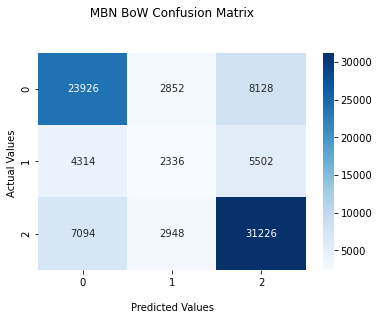

In [ ]:
mnb_bow_cm = confusion_matrix( test_labels, mnb_bow_predictions)
print(mnb_bow_cm)

ax = sns.heatmap(mnb_bow_cm, annot=True, cmap='Blues', fmt = 'g')

ax.set_title(' MBN BoW Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
dt_bow_predictions, dt_bow_accuracy = train_predict_evaluate_model(classifier=dt,
                                                               train_features=bow_train_features,
                                                               train_labels=train_labels,
                                                               test_features=bow_test_features,
                                                               test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     34906
           1       0.45      0.41      0.43     12152
           2       0.72      0.72      0.72     41268

    accuracy                           0.67     88326
   macro avg       0.61      0.61      0.61     88326
weighted avg       0.66      0.67      0.66     88326



[[24034  2912  7960]
 [ 3459  4936  3757]
 [ 8150  3226 29892]]


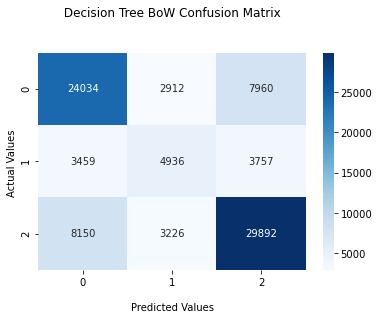

In [ ]:
dt_bow_cm = confusion_matrix( test_labels, dt_bow_predictions)
print(dt_bow_cm)

ax = sns.heatmap(dt_bow_cm, annot=True, cmap='Blues', fmt = 'g')

ax.set_title(' Decision Tree BoW Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
rf_bow_predictions, rf_bow_accuracy = train_predict_evaluate_model(classifier=rf,
                                           train_features=bow_train_features,
                                           train_labels=train_labels,
                                           test_features=bow_test_features,
                                           test_labels=test_labels)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     34906
           1       0.85      0.32      0.47     12152
           2       0.76      0.87      0.81     41268

    accuracy                           0.77     88326
   macro avg       0.79      0.66      0.69     88326
weighted avg       0.77      0.77      0.75     88326



[[27810   368  6728]
 [ 3584  3910  4658]
 [ 5029   339 35900]]


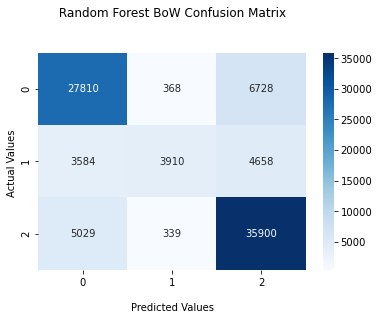

In [ ]:
rf_bow_cm = confusion_matrix( test_labels, rf_bow_predictions)
print(rf_bow_cm)

ax = sns.heatmap(rf_bow_cm, annot=True, cmap='Blues', fmt = 'g')

ax.set_title(' Random Forest BoW Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix
plt.show()

# Accuracy

In [ ]:
accuracy_dict = {}
for m in ["mnb","dt","rf"]:
    accuracy_dict[m] = {}
    for f in ["bow","tfidf"]:
        exec('accuracy_dict["{}"]["{}"] = {}_{}_accuracy'.format(m, f, m, f))

#Accuracy Matrix
pd.DataFrame(accuracy_dict).rename(columns={"mnb":"Naive Bayes",
                                            "dt":"Decision Tree",
                                            "rf":"Random Forest"},
                                   index={"bow":"Bag-of-words",
                                          "tfidf":"TFIDF"})


,Naive Bayes,Decision Tree,Random Forest
Bag-of-words,0.650862,0.666418,0.765573
TFIDF,0.667901,0.669531,0.766332
